In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as mno
import seaborn as sns
import time

In [5]:
data = pd.read_csv('lung-cancer.data')
data.head(16)

,1,0,3,0.1,?,0.2,2,2.1,2.2,1.1,...,2.25,2.26,2.27,2.28,2.29,1.12,1.13,1.14,2.30,2.31
0,1,0,3,3,1,0,3,1,3,1,...,2,2,2,2,2,2,2,1,2,2
1,1,0,3,3,2,0,3,3,3,1,...,2,2,2,2,2,2,2,2,1,2
2,1,0,2,3,2,1,3,3,3,1,...,2,2,2,2,2,2,2,2,2,2
3,1,0,3,2,1,1,3,3,3,2,...,2,2,2,2,2,2,2,1,2,2
4,1,0,3,3,2,0,3,3,3,1,...,2,2,2,2,2,2,2,2,1,2
5,1,0,3,2,1,0,3,3,3,1,...,2,2,2,2,1,2,2,2,1,2
6,1,0,2,2,1,0,3,1,3,3,...,2,2,1,2,2,2,2,1,2,2
7,1,0,3,1,1,0,3,1,3,1,...,2,2,2,2,2,2,2,1,2,2
8,2,0,2,3,2,0,2,2,2,1,...,2,2,2,1,3,2,1,1,2,2
9,2,0,2,2,0,0,3,2,3,1,...,2,2,2,2,2,2,2,2,2,2



### Attribute Information:

Attribute 1 is the class label.

All predictive attributes are nominal, taking on integer values 0-3

In [6]:
data.shape

(31, 57)

In [7]:
col_list = [c for c in data.columns if data[c].dtype == 'object']
col_list

['?', '2.17']

In [8]:
data['?'].unique().tolist()

['1', '2', '0', '?']

In [9]:
data['2.17'].unique().tolist()

['1', '2', '3', '?']

In [10]:
count =0
for x in range(0, 30):
    if data['?'][x]=='?':
        count+=1;
print('Missing in "?":', count)
count =0
for x in range(0, 30):
    if data['2.17'][x]=='?':
        count+=1;
print('Missing in "2.17":', count)

Missing in "?": 3
Missing in "2.17": 1


In [11]:
data = data[data != '?']
data = data.dropna();
data.shape

C:\Users\omarf\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


(27, 57)

In [12]:
#from sklearn.ensemble import RandomForestClassifier3
#
#train_data = data.copy()
#for i in ['?', '2.17']:
#    for j in range (0, 30):
#        X = train_data.loc[train_data['?'].notnull() & train_data['2.17'].notnull()]
#        y = train_data.loc[train_data['?'].notnull() & train_data['2.17'].notnull(), i]
#        X = X.drop(columns=[i])
#        print("Training: ", i, X.shape, y.shape)
#        randomf = RandomForestClassifier(n_estimators=200)
#        randomf.fit(X, y)
#        #print('training acuracy:', model.score(X, y))
#        X_miss = train_data[train_data[i].isnull()]
#        X_miss = X_miss.drop(columns = [i])
#        print("missing values:", X_miss.shape)
#        train_data.loc[train_data[i].isnull(), i] = randomf.predict(X_miss)

In [13]:
data.isnull().sum()

1       0
0       0
3       0
0.1     0
?       0
0.2     0
2       0
2.1     0
2.2     0
1.1     0
1.2     0
1.3     0
1.4     0
3.1     0
2.3     0
2.4     0
1.5     0
2.5     0
2.6     0
0.3     0
2.7     0
2.8     0
2.9     0
2.10    0
1.6     0
2.11    0
2.12    0
2.13    0
3.2     0
2.14    0
1.7     0
1.8     0
1.9     0
3.3     0
3.4     0
2.15    0
2.16    0
1.10    0
2.17    0
2.18    0
2.19    0
1.11    0
2.20    0
2.21    0
2.22    0
2.23    0
2.24    0
2.25    0
2.26    0
2.27    0
2.28    0
2.29    0
1.12    0
1.13    0
1.14    0
2.30    0
2.31    0
dtype: int64

In [14]:

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

def Classification_model_gridsearchCV(model,param_grid,data_X,data_y, X_test1, y_test1):
    clf = GridSearchCV(model,param_grid,cv=2,scoring="accuracy")
       
    clf.fit(data_X,data_y)
    print("The best parameter found on development set is :")
    print(clf.best_params_)
    print("the best estimator is ")
    print(clf.best_estimator_)
    print("The Training best score is ", clf.score(data_X,data_y))
    print(clf.best_score_)
    print("The best Testing score is :", clf.score(X_test1,y_test1))
    
    
    cm = confusion_matrix(y_test1, clf.predict(X_test1))
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True)
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.show()

In [15]:
from sklearn.model_selection import train_test_split
y = data['1']
X = data.drop(columns=['1'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("Training Set Dimensions:", X_train.shape)
print("Validation Set Dimensions:", X_test.shape)

Training Set Dimensions: (21, 56)
Validation Set Dimensions: (6, 56)


# Decision Trees

The best parameter found on development set is :
{'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 3}
the bset estimator is 
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Training best score is  0.8095238095238095
0.6136363636363636
The best Testing score is : 0.5


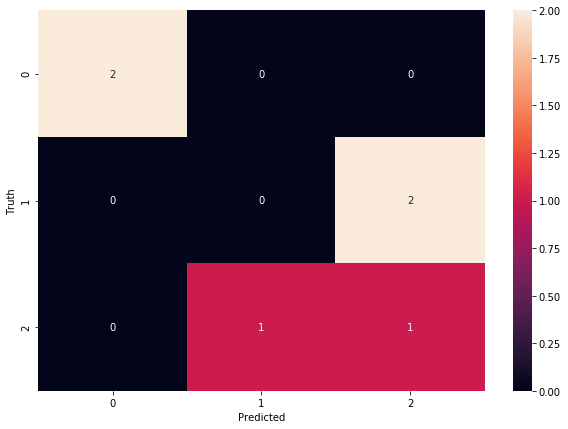

In [47]:
from sklearn.tree import DecisionTreeClassifier
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'min_samples_split': [2,3], 
              'min_samples_leaf':[2,3,4] }

model= DecisionTreeClassifier()
Classification_model_gridsearchCV(model,param_grid,X_train,y_train, X_test, y_test)

# Support Vector Machine

The best parameter found on development set is :
{'C': 1, 'kernel': 'linear'}
the bset estimator is 
SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
The Training best score is  1.0
0.5227272727272727
The best Testing score is : 0.3333333333333333


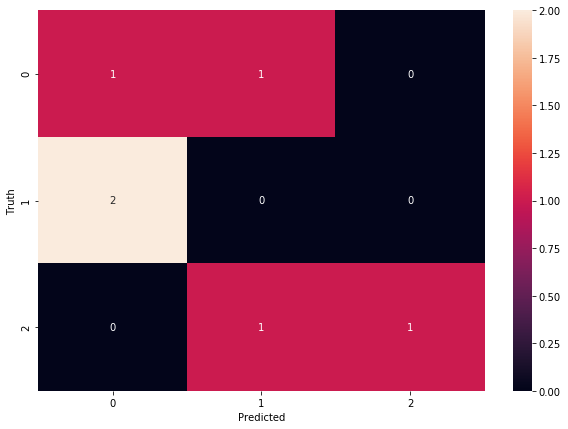

In [49]:
from sklearn.svm import SVC
model=SVC()
param_grid = [
              {'C': [1, 10, 100, 1000], 
               'kernel': ['linear']
              },
              {'C': [1, 10, 100, 1000], 
               'gamma': [0.001, 0.0001], 
               'kernel': ['rbf']
              },
 ]
Classification_model_gridsearchCV(model,param_grid,X_train,y_train,X_test, y_test)

# KNN

The best parameter found on development set is :
{'leaf_size': 1, 'n_neighbors': 1, 'weights': 'uniform'}
the best estimator is 
KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')
The Training best score is  1.0
0.5727272727272728
The best Testing score is : 0.6666666666666666


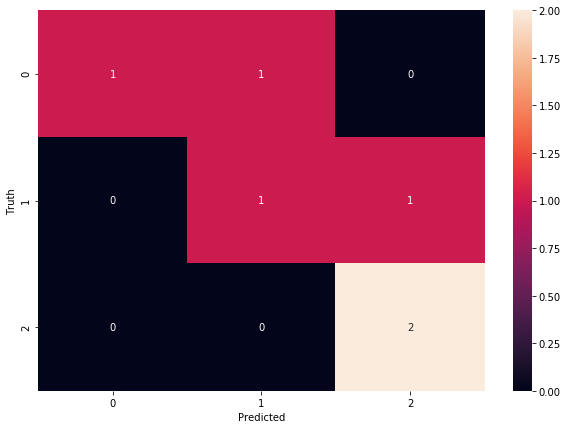

In [16]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

k_range = list(range(1, 10))
leaf_size = list(range(1,30))
weight_options = ['uniform', 'distance']
param_grid = {'n_neighbors': k_range, 'leaf_size': leaf_size, 'weights': weight_options}
Classification_model_gridsearchCV(model,param_grid,X_train,y_train, X_test, y_test)

# Random Forest

The best parameter found on development set is :
{'bootstrap': True, 'max_depth': 14, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 350}
the bset estimator is 
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=14, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=350,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
The Training best score is  0.9523809523809523
0.5772727272727273
The best Testing score is : 0.8333333333333334


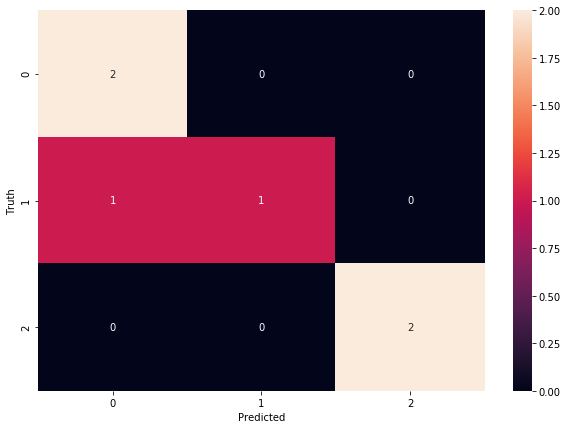

In [53]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)

n_estimators = [int(x) for x in np.linspace(start=350, stop = 450, num = 4)]
max_features = ['auto', 'sqrt']
max_depth = [14, 18, 32]
min_samples_split= [2,6, 10]
min_samples_leaf = [1, 2]
bootstrap = [True, False]

param_grid = {'n_estimators': n_estimators,
             'max_features': max_features,
             'max_depth': max_depth,
             'min_samples_split': min_samples_split,
             'min_samples_leaf': min_samples_leaf,
             'bootstrap': bootstrap}

Classification_model_gridsearchCV(model,param_grid,X_train,y_train, X_test, y_test)

Hence, we conclude that Random forest performed the best with accuracy of 83.3%